In [1]:
# Import libraries 
import cv2
from mediapipe.python.solutions import face_detection, face_mesh, drawing_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import mediapipe.framework.formats.landmark_pb2 as mp_landmark

In [90]:
image_path = '/Users/lancelotbosseler/code/labosseler/final-project/final-attention/notebooks/trial-images/profile-close.jpg'

In [72]:
#transform into array 
def cv2_process(image_path: str):
    #transform image into an np.ndarray 
    image_array = cv2.imread(image_path)
    #Convert the BGR image to RGB
    image_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    
    return image_rgb
    

In [73]:
#return the coordinates of every faces on the pic 
def face_coordinates(image_path: str) -> list:                           # output = list of dictionaries of bbox coordinates  
    with face_detection.FaceDetection(
        model_selection=1, min_detection_confidence=0.5) as face_det:
        image_rgb = cv2_process(image_path)
        results = face_det.process(image_rgb)
        boxes_list = [] 
        #score_list = []
        if results.detections: 
            for detection in results.detections: 
                bbox = detection.location_data.relative_bounding_box
                h, w, _ = image_rgb.shape
                x1 = int(bbox.xmin * w) - int(0.05 * int(bbox.xmin * w))
                y1 = int(bbox.ymin * h) - int(0.05 * int(bbox.ymin * h))
                x2 = int((bbox.xmin + bbox.width) * w) + int(0.05 * int(bbox.xmin * w))
                y2 = int((bbox.ymin + bbox.height) * h) + int(0.05 * int(bbox.ymin * h))
                coordinates = {f'x1':x1,f'y1':y1,f'x2':x2,f'y2':y2}
                boxes_list.append(coordinates)
                #score_list.append(detection.score)
                
    ##TO DO: return list of bbox coordinates 
    return boxes_list  #, score_list

In [74]:
#return the pic with the box on the identified faces 
def plot_image_boxes(image_path:str):
    box_coor = face_coordinates(image_path)
    image_rgb = cv2_process(image_path)
    for bbox in box_coor:
        x1 = bbox["x1"]
        y1 = bbox["y1"]
        x2 = bbox["x2"]
        y2 = bbox["y2"]
        image_annoted = cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return plt.imshow(image_annoted)

In [75]:
#Cropped the face on the the photo 
def crop_faces(image_path:str):
    faces = []
    image_rgb = cv2_process(image_path)
    box_coor = face_coordinates(image_path)
    for bbox in box_coor:
        x1 = bbox["x1"]
        y1 = bbox["y1"]
        x2 = bbox["x2"]
        y2 = bbox["y2"]
        face = image_rgb[y1:y2, x1:x2]
        faces.append(face)
    
    return faces 
        

In [11]:
# Show cropped faces
def plot_crop_faces(image_path:str):
    faces_cropped = crop_faces(image_path)
    fig, axs = plt.subplots(1, len(faces_cropped), figsize=(20, 10))
    for i,face in enumerate(faces_cropped):
        axs[i].imshow(face)
    return plt.show()

image_path = ''
image = cv2_process(image_path)
crops = split_image(image)
boxes_list_all = []
for crop in crops:
    boxes_list_crop = face_coordinates(crop)
    boxes_list_all.append(boxes_list_crop)
boxes_list_total = reconstruct_coordinates(boxes_list_all)
plot_image_boxes(image, boxes_list_total)
crop_faces(image, boxes_list_all)

## Mesh part 

In [70]:
#mesh detection 
def mesh_detection(face: np.ndarray) -> mp_landmark.NormalizedLandmarkList:
    with face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=10,
            min_detection_confidence=0.5,
            refine_landmarks=True,
            min_tracking_confidence=0.5) as face_meshe:
        results = face_meshe.process(face)
        if results.multi_face_landmarks:
                face_landmarks = results.multi_face_landmarks[0]
                #annotated_image = face.copy()
                #drawing_utils.draw_landmarks(annotated_image, face_landmarks)
                #plt.imshow(annotated_image)
                return face_landmarks
        
        return None

In [88]:
# mesh plot 
def plot_image_mesh(image_path:str):
    image_rgb = cv2_process(image_path)
    face_landmarks = mesh_detection(image_rgb)
    annotated_image = image_rgb.copy()
    drawing_utils.draw_landmarks(annotated_image, face_landmarks)

    return plt.imshow(annotated_image)

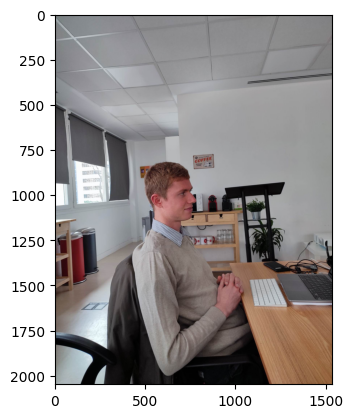

In [91]:
plot_image_mesh(image_path)